# Predicting Abalone Age
## Phase 1: Data Preparation & Visualization
**Group Name: Group 29**

**Name(s) & ID(s) of Group Members:**


Chris Park (s3973667),
Henry Van Toledo (s3849054),
Luka Finn Shannon Hill (s3948396),
Wai Yan Lin (s3963096)
***

## Table of contents
* [Introduction](#Introduction)
    + [Dataset Source](#Dataset-Source)
    + [Dataset Details](#Dataset-Details)
    + [Dataset Variables](#Dataset-Variables)
    + [Response Variable](#Response-Variable)
* [Goals and Objectives](#Goals-and-Objectives)
* [Data Cleaning and Preprocessing](Data-Cleaning-and-Preprocessing)
***

## Introduction 
### Dataset Source
The abalone dataset used in this notebook was sourced from the UCI machine learning repository which was provided in Akmand's dataset repository. This dataset contaiins several different attributes relating to an abalone's weights, measurements, gender and rings. The abalones from this dataset were collected from the Bass Strait, which is located between Australia and mainland Australia.

## Dataset Details

This dataset is simply about abalones and contains information on the properties of each individual abalone added to the database. These properties are the physical measurements, physical weights, gender, and the number of rings of an abalone. We will be using this data to predict the age of an abalone which is determined by the number of rings on it plus 1.5. **We will add this new variable to the dataset.** 

In [118]:
# Imports
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

# Imported the database that we obtained from the github repository provided in the modules
aba_df = pd.read_csv("https://raw.githubusercontent.com/akmand/datasets/main/abolone.csv")
aba_df = aba_df.assign(Age = aba_df.Rings + 1.5)
aba_df.sample(10, random_state=420)

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
190,M,0.615,0.480,0.180,1.1595,0.4845,0.2165,0.3250,13,14.5
4102,M,0.680,0.545,0.185,1.6720,0.7075,0.3640,0.4800,11,12.5
1293,I,0.520,0.400,0.130,0.5825,0.2330,0.1365,0.1800,10,11.5
1800,M,0.605,0.475,0.175,1.2525,0.5575,0.3055,0.3430,9,10.5
1167,M,0.620,0.470,0.135,1.0195,0.5315,0.2005,0.2475,8,9.5
1858,F,0.510,0.400,0.120,0.7005,0.3470,0.1105,0.1950,10,11.5
2804,F,0.660,0.505,0.190,1.4045,0.6255,0.3375,0.3745,9,10.5
714,M,0.350,0.255,0.080,0.1915,0.0800,0.0385,0.0630,9,10.5
108,F,0.510,0.390,0.135,0.6335,0.2310,0.1790,0.2000,9,10.5
75,F,0.600,0.475,0.150,1.0075,0.4425,0.2210,0.2800,15,16.5


## Dataset Variables

In [119]:
from tabulate import tabulate

table = [['Name','Data Type','Units','Description'],
         ['Gender','Nominal Catagorical','NA','M - Male \nF - Female \nI - Infant'],
         ['Length','Numeric', 'Feet', 'Longest shell measurement' ],
         ['Diameter', 'Numeric', 'Feet', 'Diameter of Abalone perpendicular to length' ],
         ['Height', 'Numeric', 'Feet', 'Height of abalone with meat in shell'],
         ['Whole weight', 'Numeric', 'Kilogram', 'Weight of whole abalone'],
         ['Shucked weight', 'Numeric', 'Kilograms', 'Weight of meat inside the abalone'],
         ['Shucked weight', 'Numeric', 'Kilograms', 'Weight of flesh after bleeding'],
         ['Shell weight', 'Numeric', 'Kilograms', 'Weight after being dried'],
         ['Rings', 'Numeric', 'Integer', 'Num of rings counted on the inside shell of the abalone' ],
         ['Age', 'Numeric', 'Years', 'Approximate age of the abalone calculated by adding 1.5 to number of shells']]
         
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════╤═════════════════════╤═══════════╤═════════════════════════════════════════════════════════════════════════════╕
│ Name           │ Data Type           │ Units     │ Description                                                                 │
╞════════════════╪═════════════════════╪═══════════╪═════════════════════════════════════════════════════════════════════════════╡
│ Gender         │ Nominal Catagorical │ NA        │ M - Male                                                                    │
│                │                     │           │ F - Female                                                                  │
│                │                     │           │ I - Infant                                                                  │
├────────────────┼─────────────────────┼───────────┼─────────────────────────────────────────────────────────────────────────────┤
│ Length         │ Numeric             │ Feet      │ Longest shell measurement     

# Response Variable
For this study the response variable in our dataset will be the age of the abalone. We will be predicting the age of an abalone ( Number of rings + 1.5) by using the other variables in this dataset.

# Goals & Objectives
- being overfished
- Being able to determine the age of the abalone without needing to count the rings as counting the rings as to count the number of rings the abalone has to be killed
- **The age of Abalone is determined by cutting the shell through the cone and staining it and counting the number of rings through a microscope.** (I copied this)
- We will then be able to tell which abalones should be thrown back if fished as they are still not mature
- by doing this we will be able to avoid overfishing
- al

# Data Cleaning and Preprocessing
Here we take steps to check and clean the data for our data prediction. Although the data in this dataset already seems cleaned we will still take steps to check if there might be anything that was missed. Also if there are attributes we seem irrelevant to our study they will be dropped. 


In [120]:
aba_df.sort_values(by="Shell weight" , ascending=False).head()

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
163,F,0.725,0.560,0.210,2.1410,0.6500,0.3980,1.005,18,19.5
891,M,0.730,0.595,0.230,2.8255,1.1465,0.4190,0.897,17,18.5
2161,F,0.715,0.565,0.240,2.1995,0.7245,0.4650,0.885,17,18.5
2108,M,0.665,0.535,0.225,2.1835,0.7535,0.3910,0.885,27,28.5
166,F,0.725,0.575,0.175,2.1240,0.7650,0.4515,0.850,20,21.5


### Data Cleaning Steps
- Check for missing values
- Remove all the rows with missing values
- Random sampling of the dataset for 4000 rows

In [121]:
aba_df.columns

Index(['Gender', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings', 'Age'],
      dtype='object')

In [122]:
print(aba_df.isnull().sum())

Gender            0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64


In [123]:
aba_df.columns = aba_df.columns.str.lower().str.strip()

columns_mapping = {
    'whole weight': 'whole_weight',
    'shucked weight': 'shucked_weight',
    'viscera weight': 'viscera_weight',
    'shell weight': 'shell_weight'
}

# rename columns
aba_df = aba_df.rename(columns = columns_mapping)
aba_df.sample(5, random_state=999)

,gender,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,age
3259,M,0.640,0.505,0.165,1.4435,0.6145,0.3035,0.390,18,19.5
3583,F,0.625,0.500,0.175,1.2730,0.5640,0.3020,0.374,9,10.5
1932,F,0.620,0.495,0.170,1.0620,0.3720,0.2130,0.340,11,12.5
3328,I,0.575,0.475,0.170,0.9670,0.3775,0.2840,0.275,13,14.5
2426,I,0.565,0.435,0.155,0.7820,0.2715,0.1680,0.285,14,15.5


In [124]:
print(aba_df.dtypes)

gender             object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
age               float64
dtype: object


In [125]:
aba_df.describe(include='object').T

,count,unique,top,freq
gender,4177,3,M,1528


In [126]:
categoricalColumns = aba_df.columns[aba_df.dtypes==object].tolist()

for col in categoricalColumns:
    print('Unique values for ' + col)
    print(aba_df[col].unique())
    print('')

Unique values for gender
['M' 'F' 'I']



In [127]:
aba_df.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
whole_weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
shucked_weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
viscera_weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
shell_weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000
age,4177.0,11.433684,3.224169,2.5000,9.5000,10.5000,12.500,30.5000


In [128]:
aba_df = aba_df.sample(n=4000, random_state=420)
aba_df.sample(5, random_state=420)

,gender,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,age
2574,M,0.480,0.370,0.100,0.5135,0.2430,0.1015,0.1350,8,9.5
3901,F,0.525,0.430,0.125,0.8130,0.3315,0.1660,0.1775,12,13.5
3054,M,0.600,0.450,0.150,0.8665,0.3695,0.1955,0.2550,12,13.5
224,I,0.425,0.380,0.105,0.3265,0.1285,0.0785,0.1000,10,11.5
2813,I,0.255,0.195,0.055,0.0725,0.0285,0.0170,0.0210,4,5.5


In [129]:
aba_df

,gender,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,age
190,M,0.615,0.480,0.180,1.1595,0.4845,0.2165,0.3250,13,14.5
4102,M,0.680,0.545,0.185,1.6720,0.7075,0.3640,0.4800,11,12.5
1293,I,0.520,0.400,0.130,0.5825,0.2330,0.1365,0.1800,10,11.5
1800,M,0.605,0.475,0.175,1.2525,0.5575,0.3055,0.3430,9,10.5
1167,M,0.620,0.470,0.135,1.0195,0.5315,0.2005,0.2475,8,9.5
...,...,...,...,...,...,...,...,...,...,...
2094,I,0.405,0.305,0.090,0.2825,0.1140,0.0575,0.0950,7,8.5
894,I,0.240,0.175,0.065,0.0665,0.0310,0.0135,0.0170,3,4.5
1326,M,0.565,0.445,0.150,0.7960,0.3635,0.1840,0.2190,8,9.5
2407,I,0.625,0.430,0.175,1.4110,0.5720,0.2970,0.3950,12,13.5


# Data exploration and visualization
cleaned dataset will now be used to .......

### One-variable Plots Visualization
#### Bar Chart of Gender
fewafewafewafewafewafewafewa

The one-variable plots (figures 1 - 5) can be seen below, all of which summarise and depict information from our database. In figure 1 we are able to see a relatively even distribution between Males, Females and Infants, indicating that there is no dominant gender amongst Abalone's

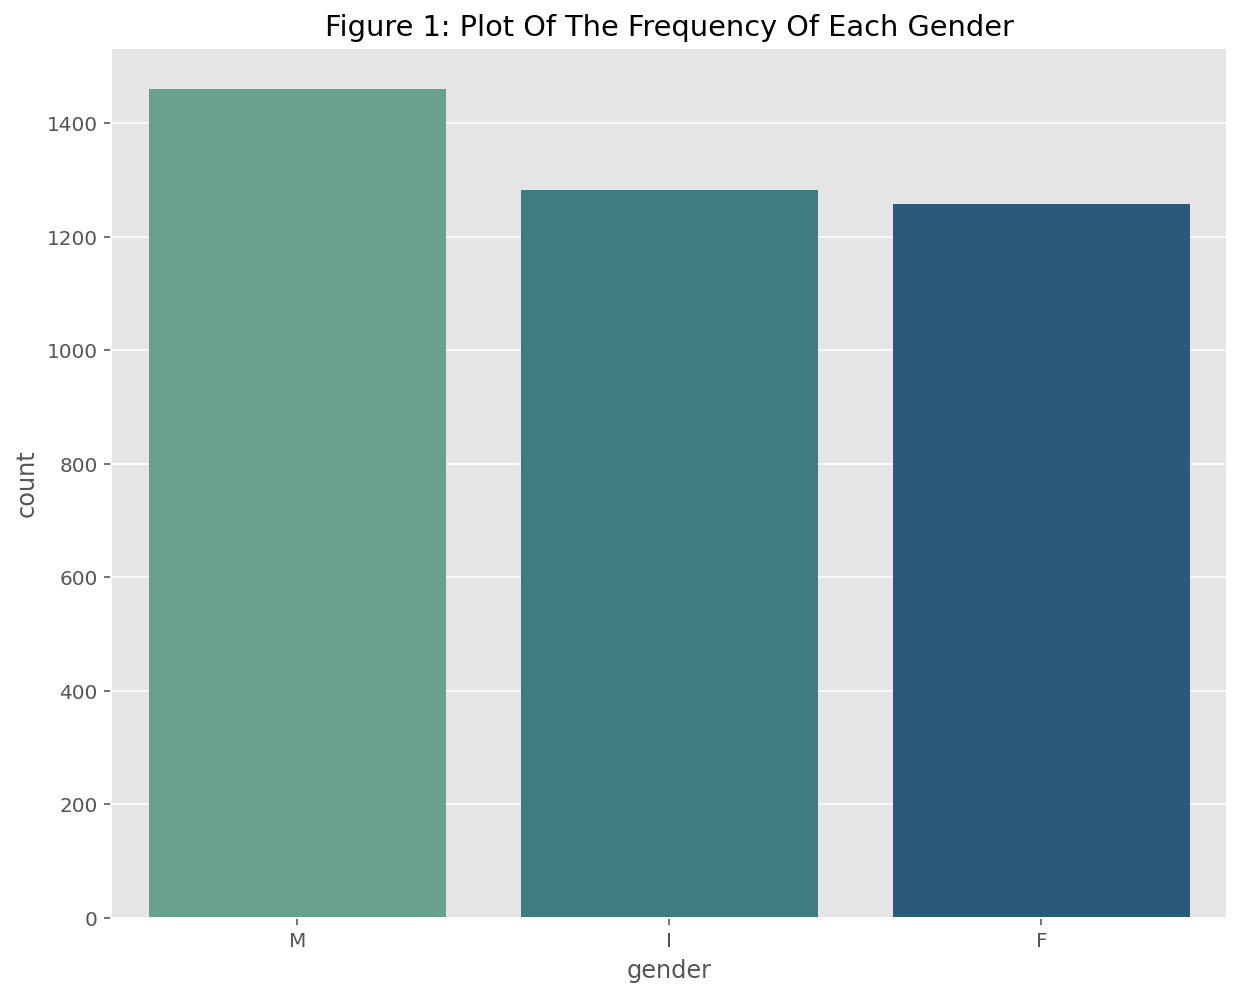

In [130]:

plt.figure(figsize = (10,8))
fig = sns.countplot(x = 'gender', data = aba_df, palette = 'crest', order = aba_df['gender'].value_counts().index) 
fig = plt.title('Figure 1: Plot Of The Frequency Of Each Gender')
plt.show()            

The box plot in Figure 2 highlights the varying ages amongst the Abalone's. Whilst the age does vary quite widely, it is clear that the majority fall within the 6 - 17 age range.

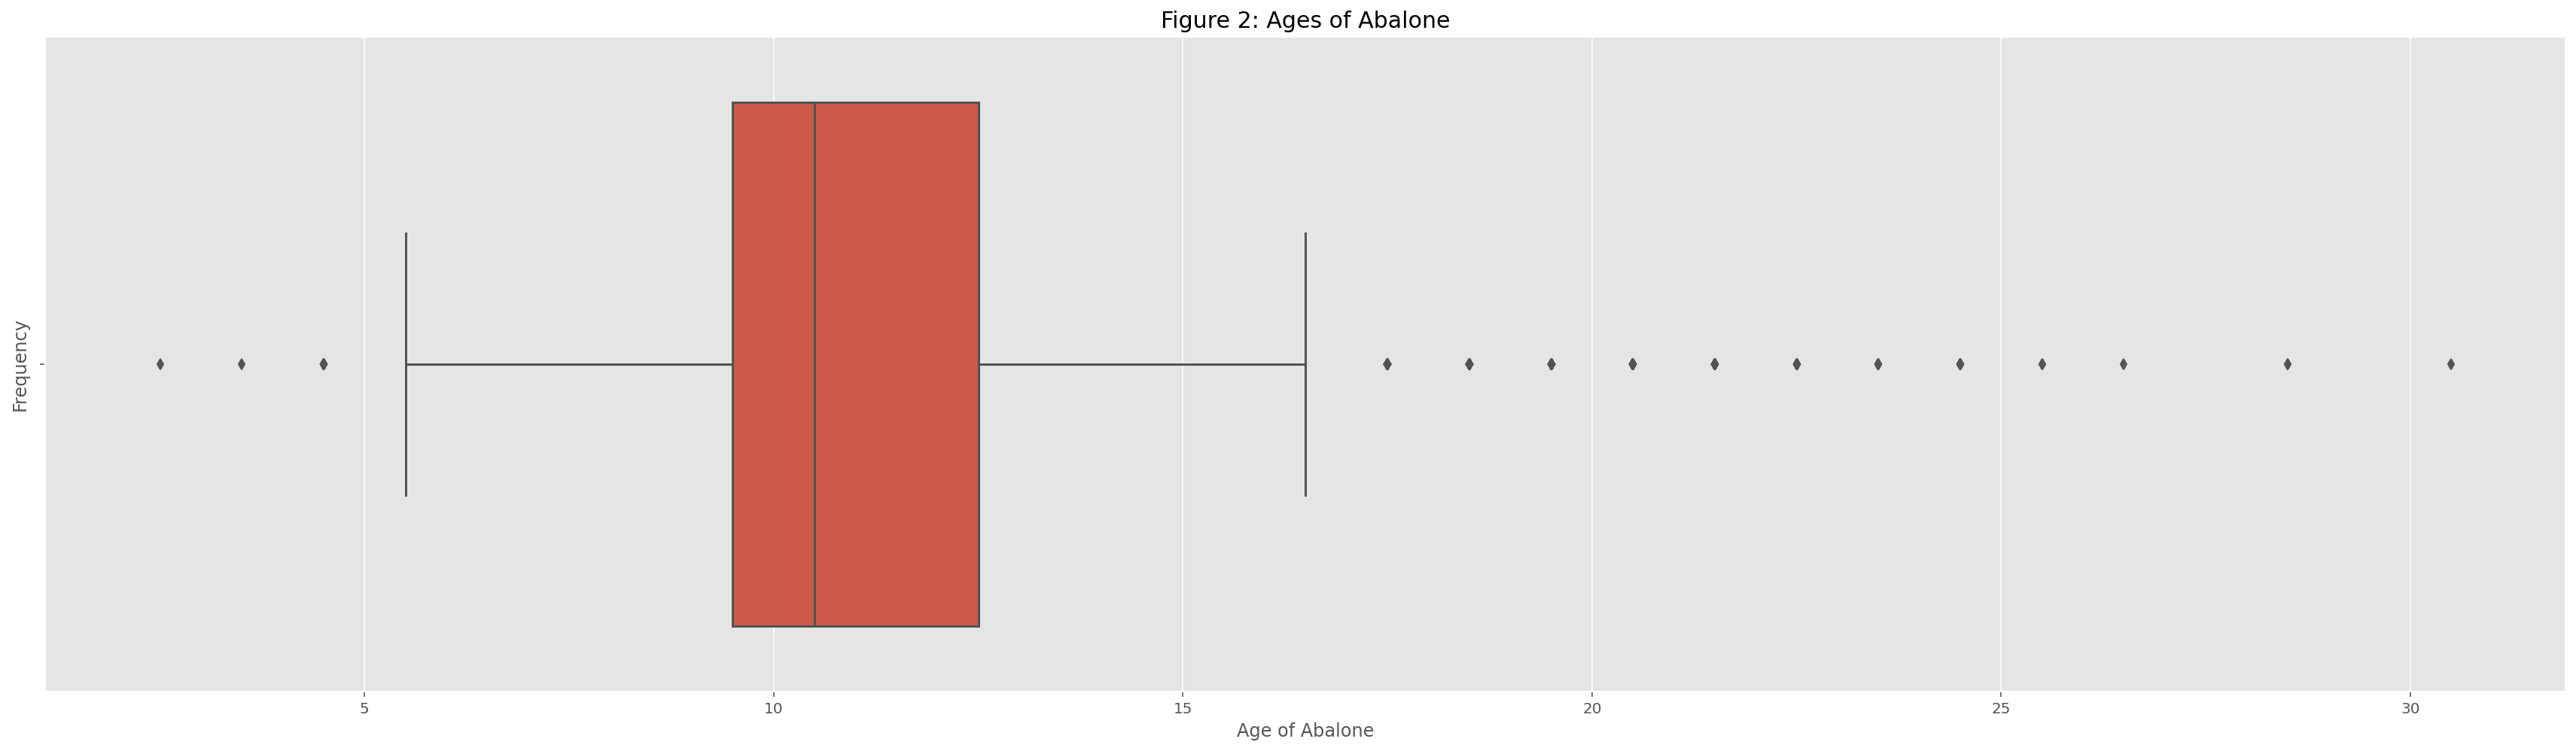

In [131]:
plt.figure(figsize = (30,8))
sns.boxplot(aba_df['age']).set_title('Figure 2: Ages of Abalone', fontsize = 15)
plt.xlabel("Age of Abalone")
plt.ylabel("Frequency")
plt.show();

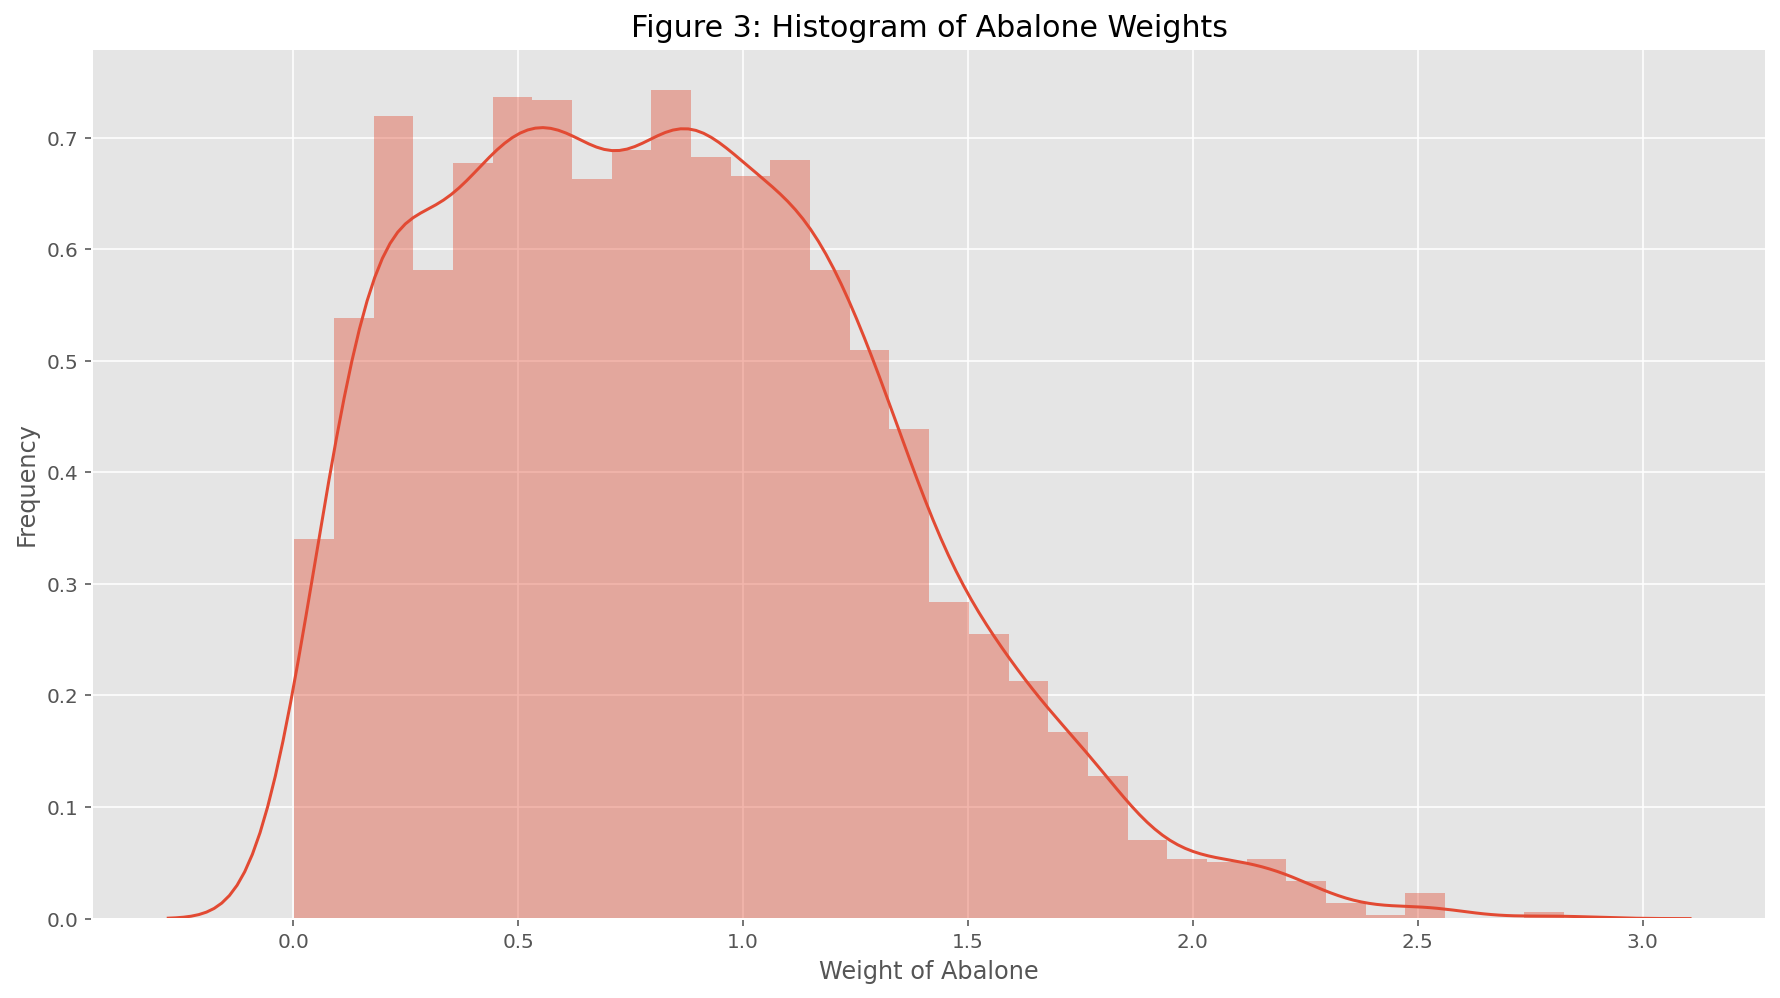

In [132]:
plt.figure(figsize = (15,8))
sns.distplot(aba_df['whole_weight'], kde=True)
plt.title('Figure 3: Histogram of Abalone Weights', fontsize = 15)
plt.xlabel("Weight of Abalone")
plt.ylabel("Frequency")
plt.show();

The bar chart in figure 4 depicts the most common lengths (feet) for an Abalone. As shown in the graph below, the majority fall within the 0.5-0.6 feet range. Contrarily in figure 5 we see the heights of the Abalone's being restricted to a much smaller range, with nothing taller then 0.3 feet.

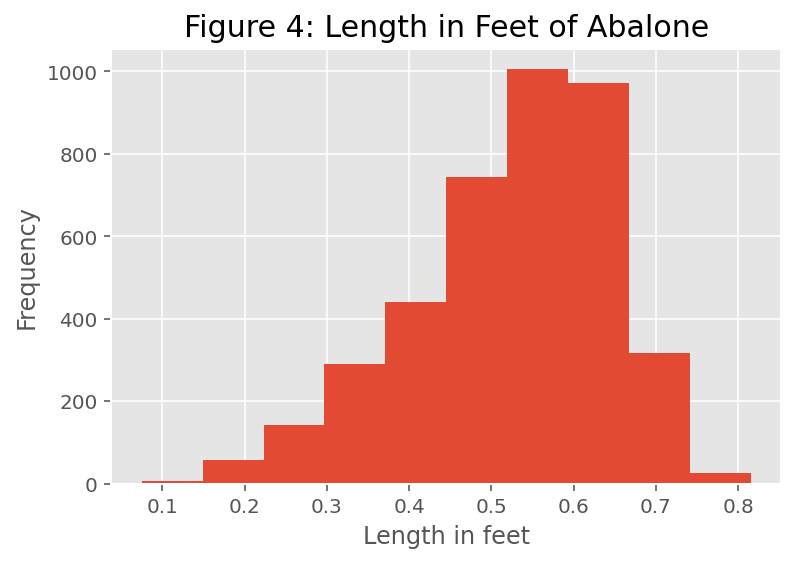

In [133]:
plt.hist(aba_df['length'])
plt.title('Figure 4: Length in Feet of Abalone', fontsize = 15)
plt.xlabel("Length in feet")
plt.ylabel("Frequency")
plt.show()

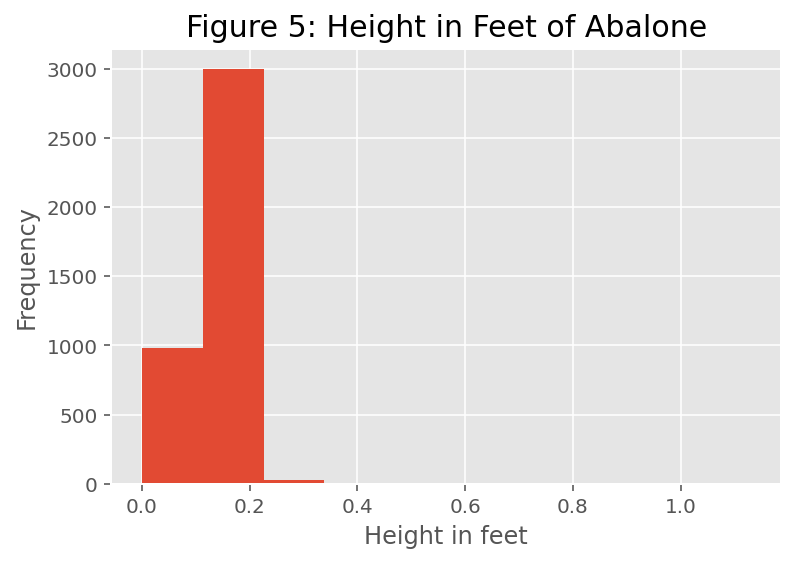

In [134]:
plt.hist(aba_df['height'])
plt.title('Figure 5: Height in Feet of Abalone', fontsize = 15)
plt.xlabel("Height in feet")
plt.ylabel("Frequency")
plt.show()

### Two-variable Plots Visualization

In Figure 6 there is quite clearly an exponetial relationship between the length in feet of the Abalone and the weight of it. This is depicted in the graph through the positive relationship between each of the variables.

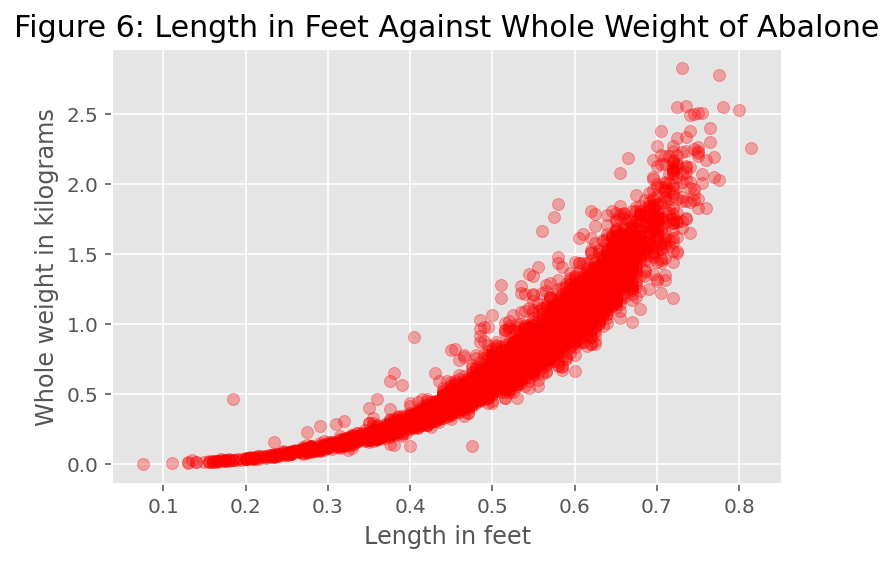

In [135]:
plt.scatter(aba_df['length'], aba_df['whole_weight'], color = "red", alpha=0.3)
plt.title('Figure 6: Length in Feet Against Whole Weight of Abalone', fontsize = 15)
plt.xlabel("Length in feet")
plt.ylabel("Whole weight in kilograms")
plt.show()

The box plot in figure 7 was created to see if there would be much of a difference in weight between each of the genders. Clearly the infant abalone's are significantly smaller which is due to their younger age and the abalone not developing completely, however when comparing males to females, there is no signifcant differences between either of them, meaning gender does not correlate to weight differences.

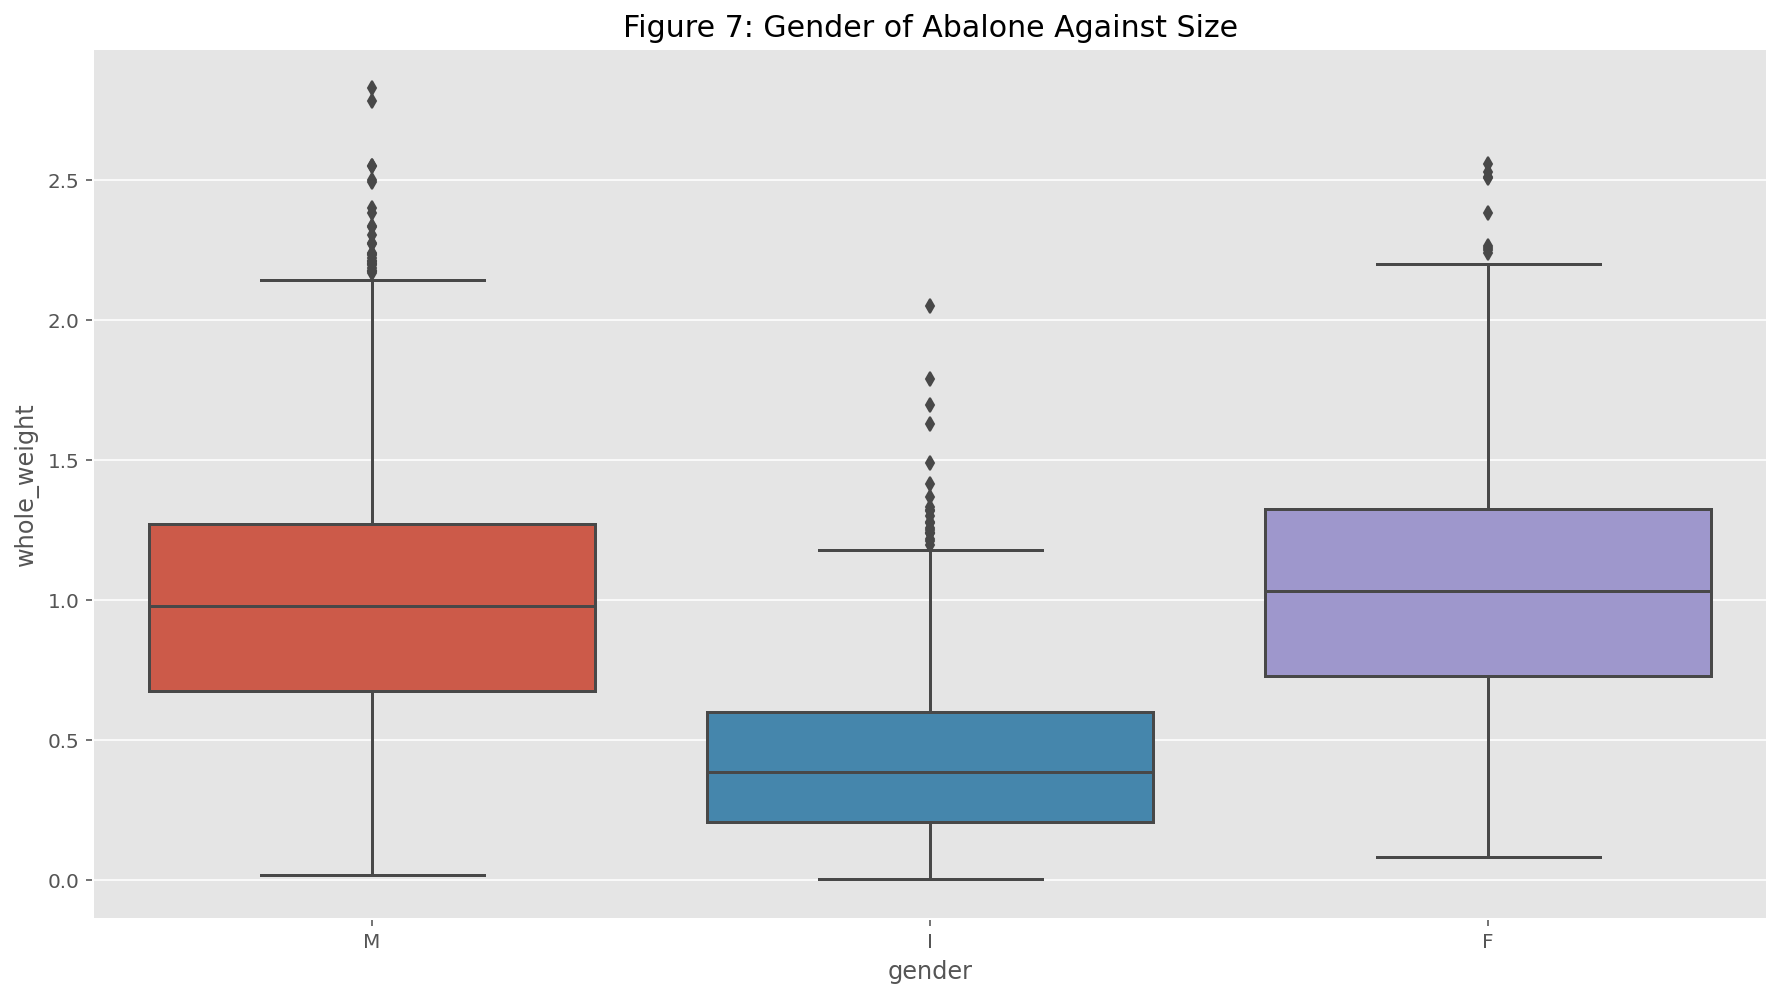

In [136]:
plt.figure(figsize = (15,8))
sns.boxplot(aba_df['gender'], aba_df['whole_weight']);
plt.title('Figure 7: Gender of Abalone Against Size', fontsize = 15)
plt.show();

The scatter plot in figure 8 compares age with the weight of the meat. We can see that there is a positive relationship between the two variables as evident by the skewed graph. Whilst there is this relationship, it is definitely not a very strong correlation as evident by the wide range of individual points on the graph

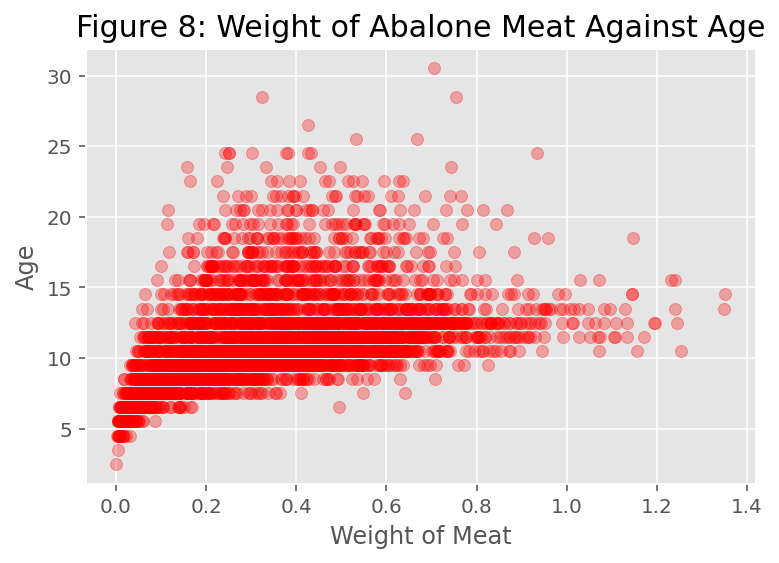

In [137]:
plt.scatter(aba_df['shucked_weight'], aba_df['age'], color = "red", alpha=0.3)
plt.title('Figure 8: Weight of Abalone Meat Against Age', fontsize = 15)
plt.xlabel("Weight of Meat")
plt.ylabel("Age")
plt.show()

Similarly to figure 8, figure 9 is looking at the correlation between length and age. We expected similar results to what is seen in figure 8, which is depicted below. Again, there is a correlation between the age and the length, however it is also quite weak.

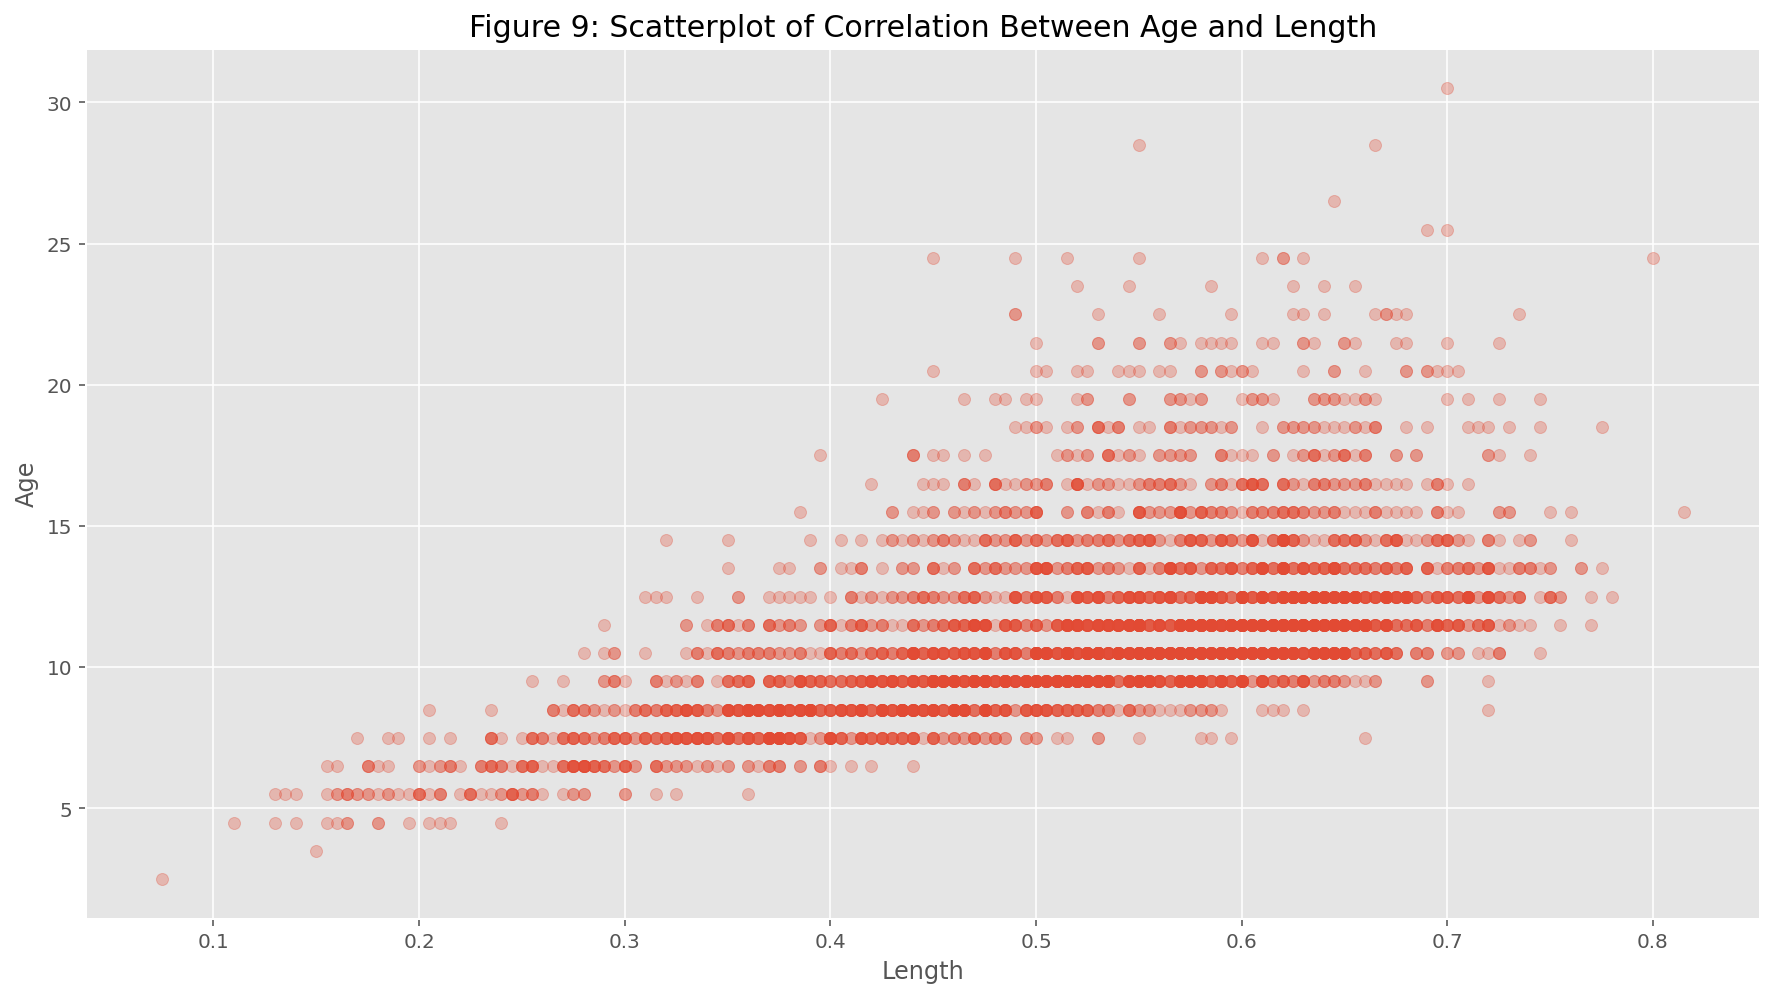

In [138]:
plt.figure(figsize = (15,8))
plt.scatter(aba_df['length'], aba_df['age'], alpha = 0.3)
plt.title('Figure 9: Scatterplot of Correlation Between Age and Length', fontsize = 15)
plt.xlabel('Length')
plt.ylabel('Age')
plt.show();

Figure 10 depicts a box plot which compares the age of the abalone against its viscera weight. There is a strong correlation in the younger years between the two variables, however as the ages begin to reach the 12.5 age range, the Viscera weight begins to flat line, meaning it is no longer a positive relationship.

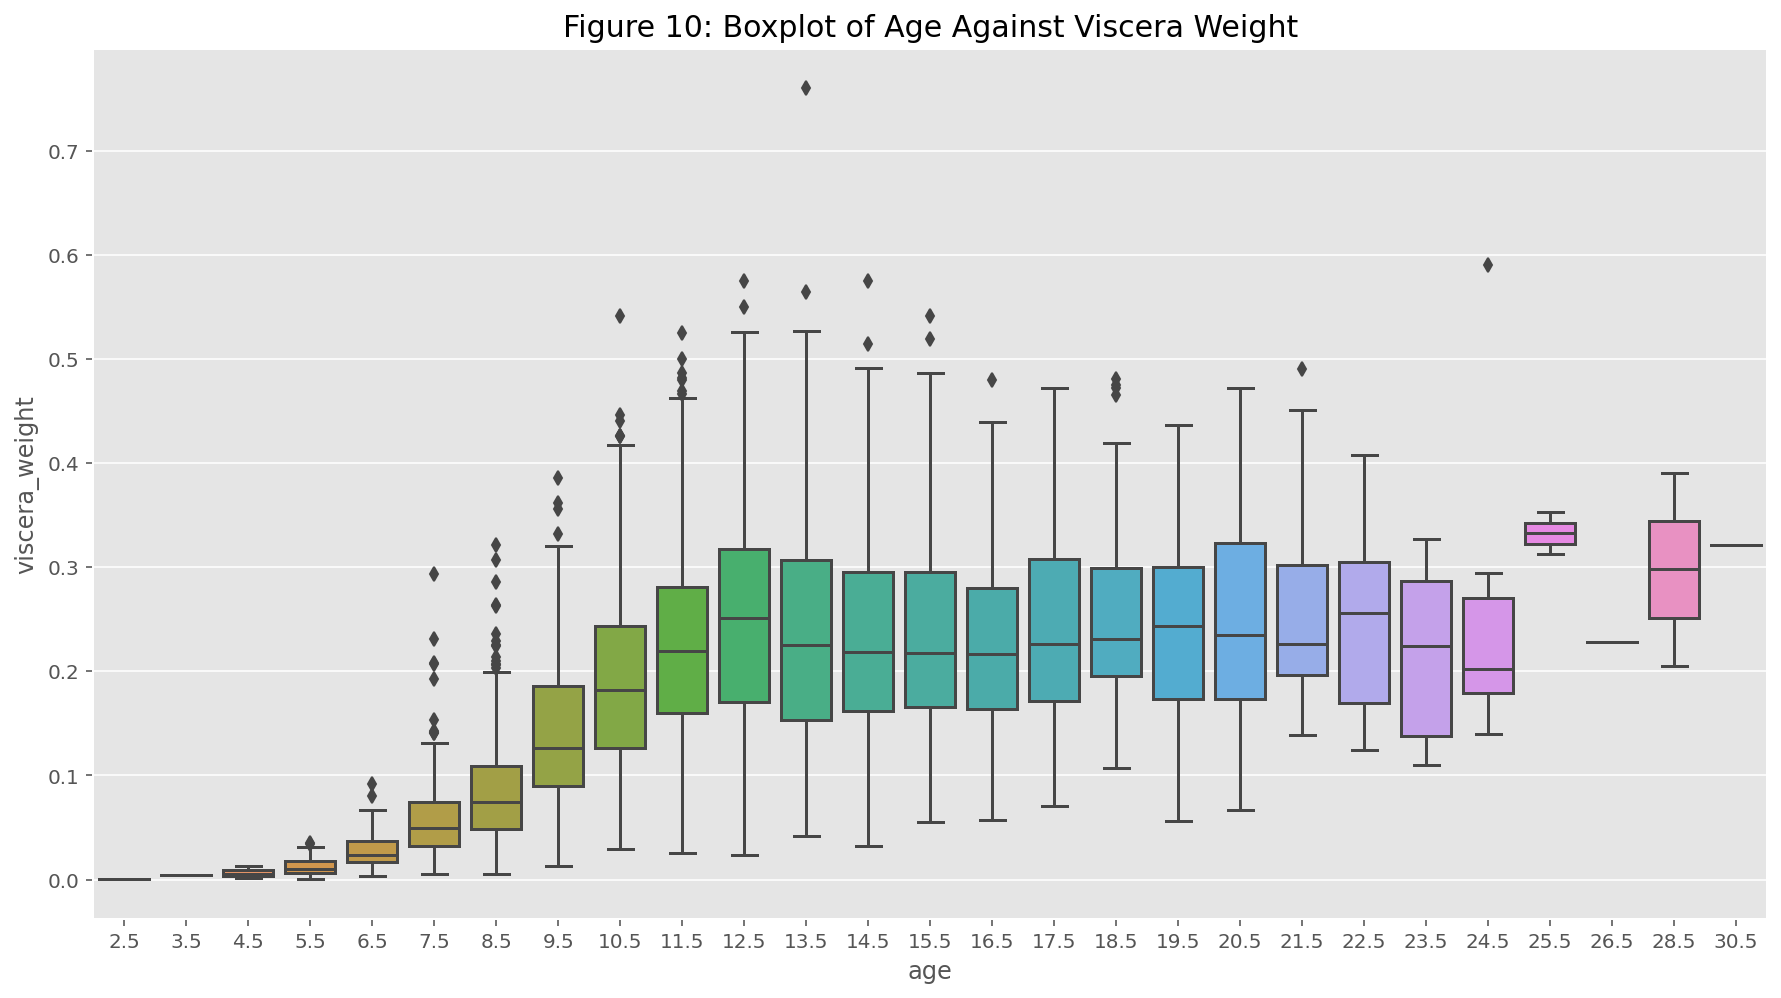

In [139]:
plt.figure(figsize = (15,8))
sns.boxplot(aba_df['age'], aba_df['viscera_weight']);
plt.title('Figure 10: Boxplot of Age Against Viscera Weight', fontsize = 15)
plt.show();

### Gender and Length

In [140]:
# plt.figure(figsize = (10,8))
# fig = sns.countplot(x = 'gender', y = aba_df['length'], data = aba_df, palette = 'crest', order = aba_df['gender'].value_counts().index) 
# fig = plt.title('Figure 1: Plot Of The Frequency Of Each Gender')
# plt.show()            

### Three-variable Plots Visualization

When observing the different measurement variables to determine the age of the abalone, we have included the variable age in all data plots to determine whether gender has an influence over the sizes of the abalone. In conclusion, we can draw from the data, that the measurements of the abalone have a threshold in accurately determining the age of the abalone at around 11.5 years of age. This means that, although we can determine the age, there is a limiter on the accuracy on determining older abalones. Gender has also given us the conclusion that there is no difference between the sizes of abalone for males and females. 

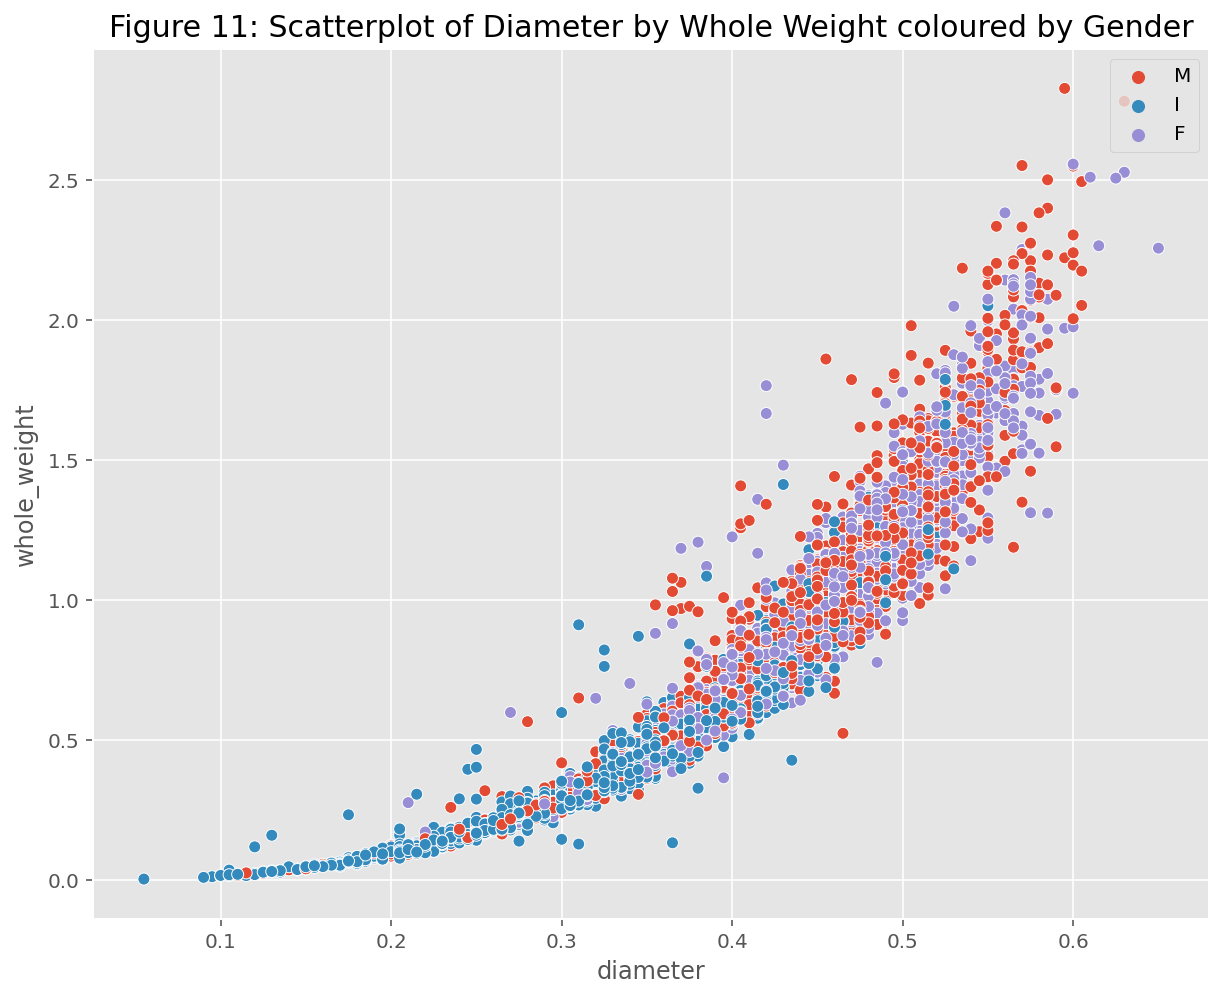

In [141]:
plt.figure(figsize = (10, 8))
sns.scatterplot(aba_df['diameter'], aba_df['whole_weight'], hue = aba_df['gender'])
plt.title('Figure 11: Scatterplot of Diameter by Whole Weight coloured by Gender', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();

When observing the different measurement variables to determine the age of the abalone, we have included the variable age in all data plots to determine whether gender has an influence over the sizes of the abalone. In conclusion, we can draw from the data, that the measurements of the abalone have a threshold in accurately determining the age of the abalone at around 11.5 years of age. This means that, although we can determine the age, there is a limiter on the accuracy on determining older abalones. Gender has also given us the conclusion that there is no difference between the sizes of abalone for males and females. 

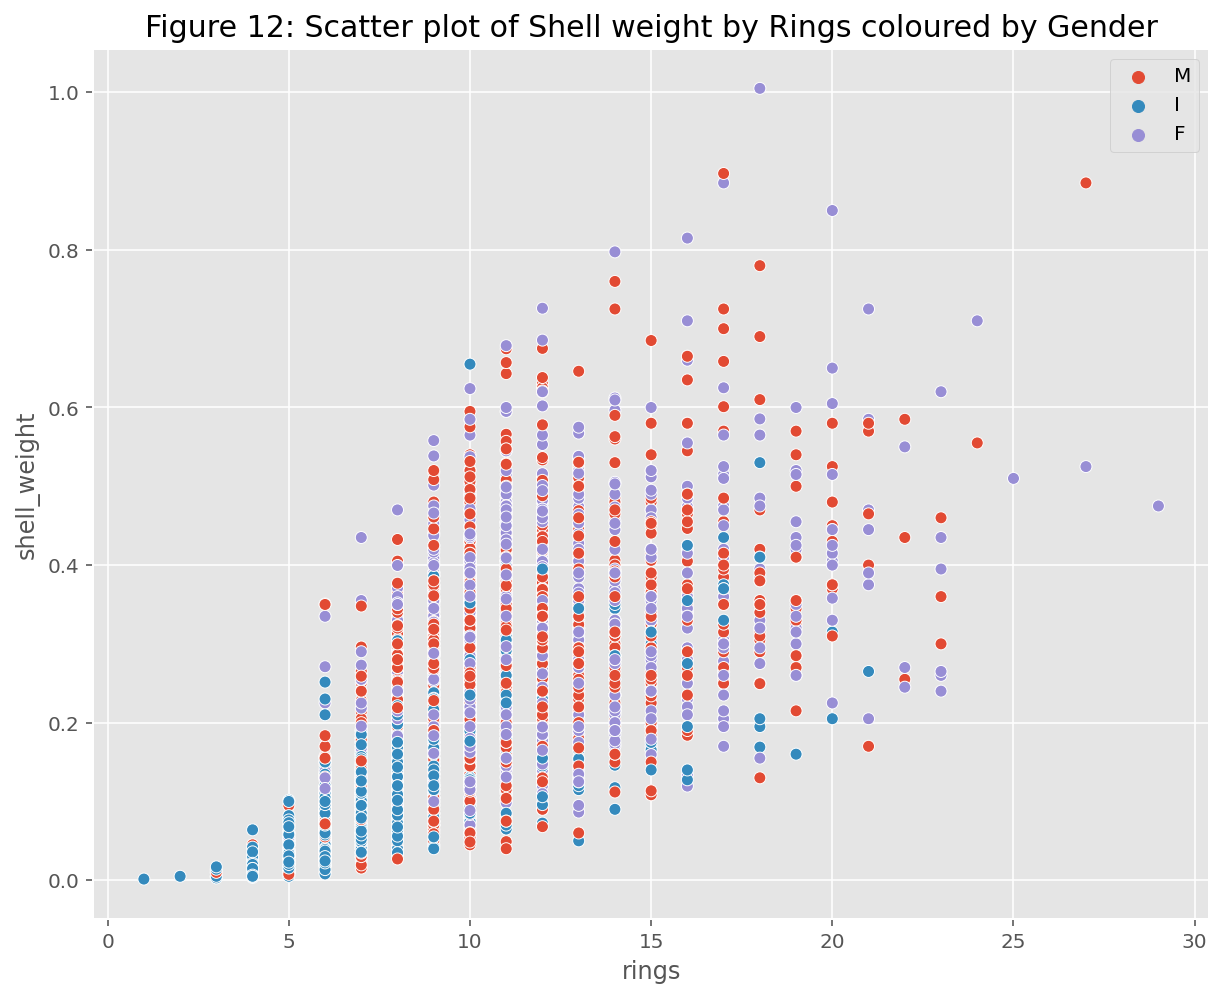

In [146]:
plt.figure(figsize = (10, 8))
sns.scatterplot(aba_df['rings'], aba_df['shell_weight'], hue = aba_df['gender'])
plt.title('Figure 12: Scatter plot of Shell weight by Rings coloured by Gender', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();

## Box plots of Age by Whole weight, Length and Diameter

To check with the correlation with age, we have decided to plot the Age by Whole Weight, Age by Diameter and Age by Length, to see if both variables show an indication to the age of the abalone. With the results below, we can accurately say that with diameter, whole weight and length, we can predict the age of the abalones. Our observation of the data tells us that the higher the variables' values are, the older the abalone. One thing to note about the data is that, after a certain threshold, the variables have platformed and thus making it hard to determine after the age of 11. Additionally, the gender variable shows indications that gender identification is not an accurate indicator for a abalone's age.

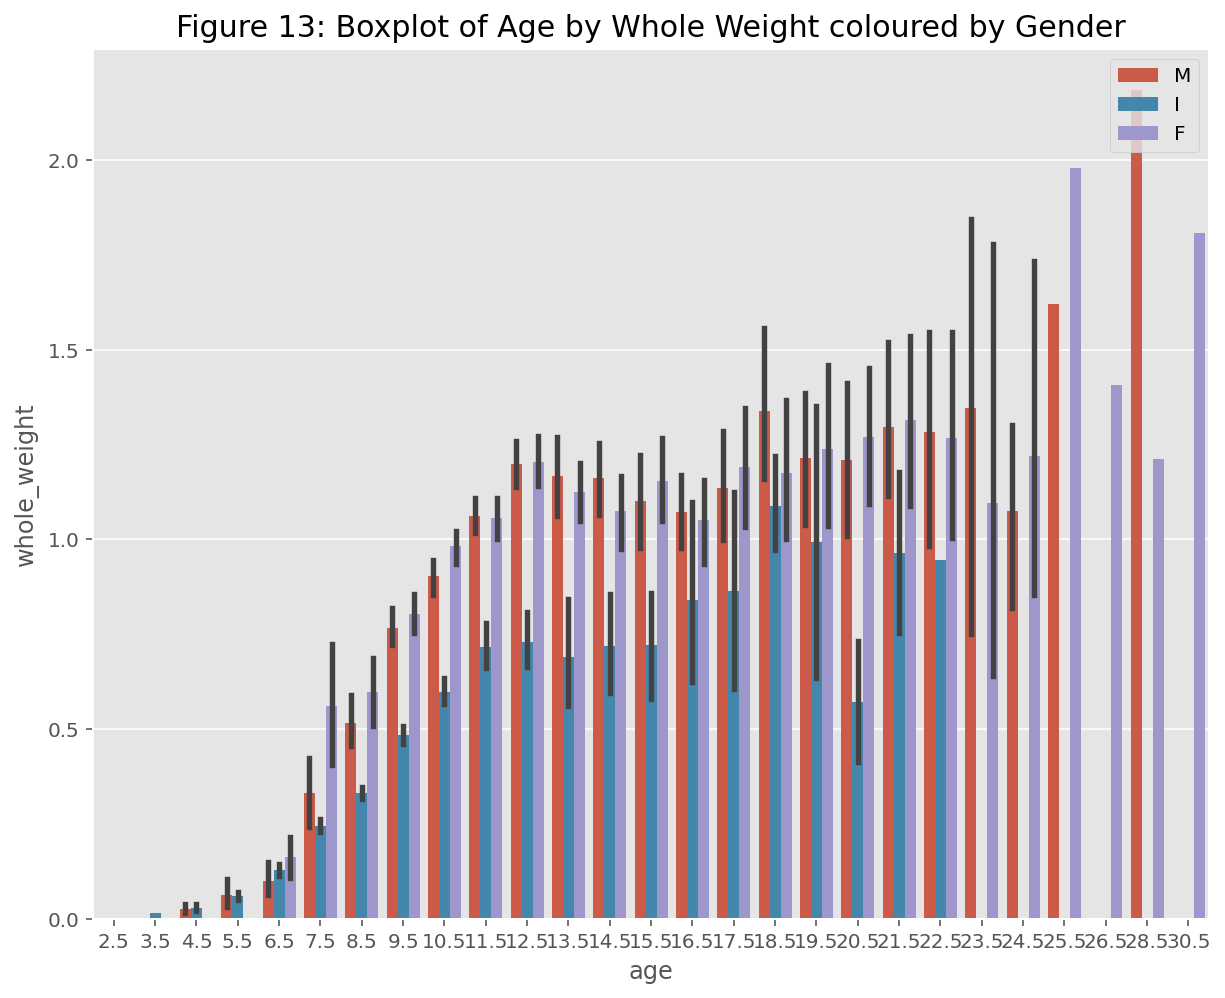

In [147]:
plt.figure(figsize = (10, 8))
sns.barplot(aba_df['age'], aba_df['whole_weight'], hue = aba_df['gender'])
plt.title('Figure 13: Boxplot of Age by Whole Weight coloured by Gender', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();

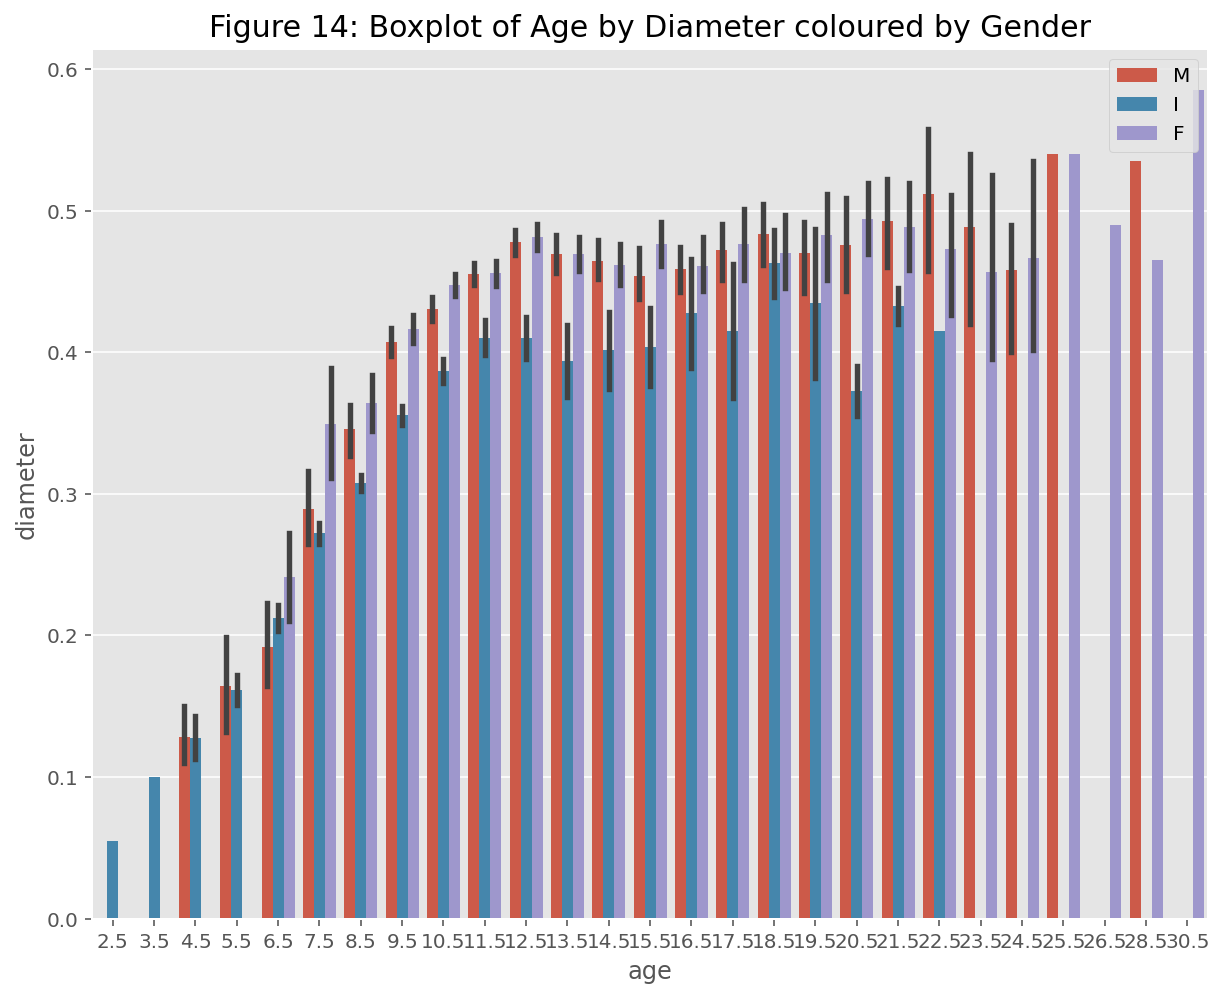

In [148]:
plt.figure(figsize = (10, 8))
sns.barplot(aba_df['age'], aba_df['diameter'], hue = aba_df['gender'])
plt.title('Figure 14: Boxplot of Age by Diameter coloured by Gender', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();

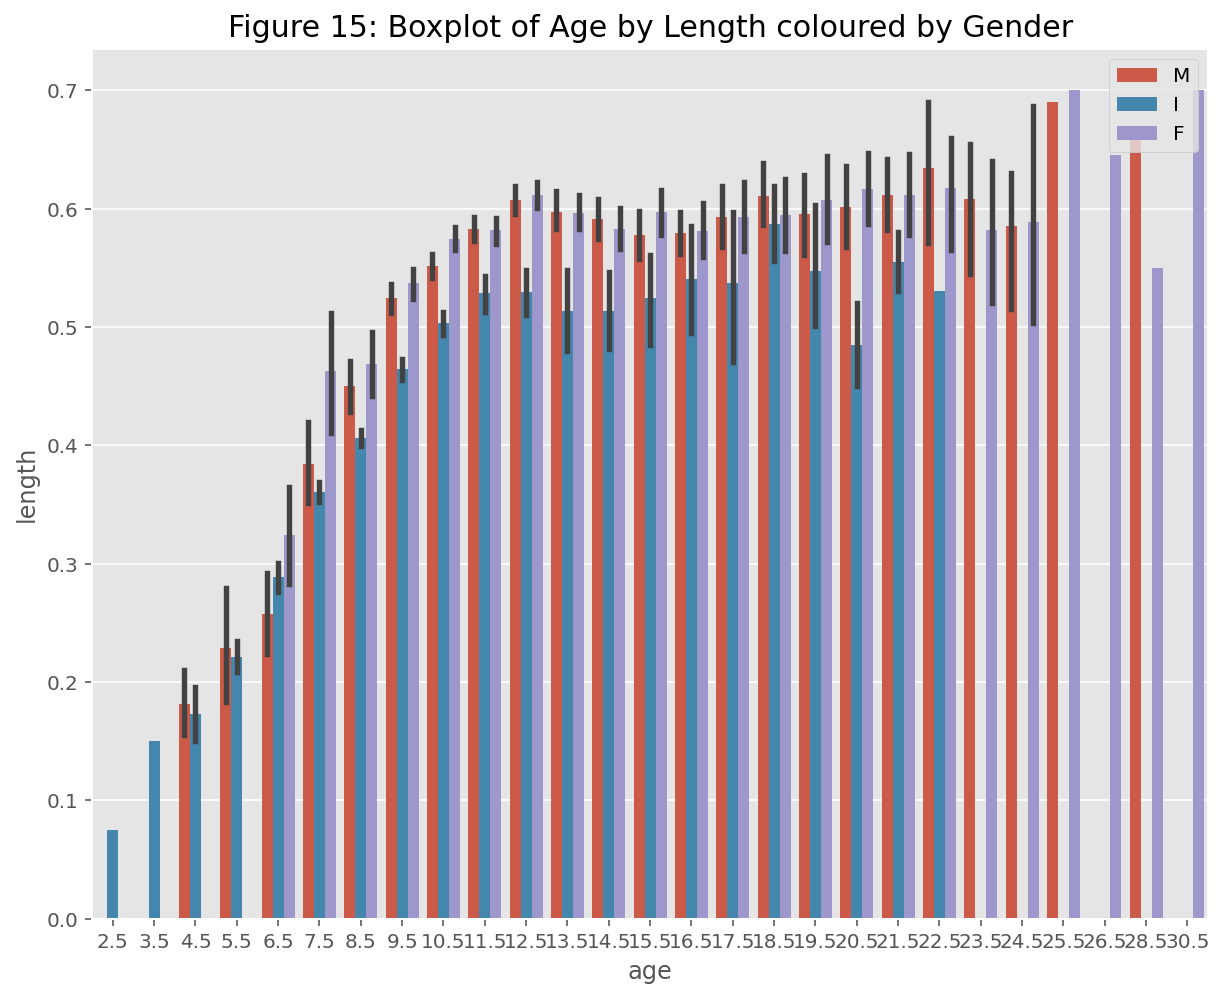

In [149]:
plt.figure(figsize = (10, 8))
sns.barplot(aba_df['age'], aba_df['length'], hue = aba_df['gender'])
plt.title('Figure 15: Boxplot of Age by Length coloured by Gender', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();